In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3x8snWoHrf3f3cP0FZWrN3XWUiIUNJyN_ivnJgroBkMG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'profitprediction-donotdelete-pr-813sahzqozhrxq'
object_key = '50_Startups.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
import numpy as np
import pandas as pd

In [3]:
df.shape

(108, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


In [9]:
import seaborn as sns

<AxesSubplot:>

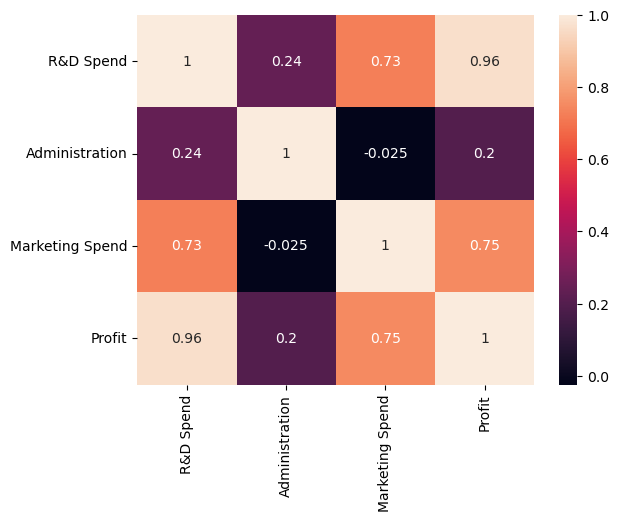

In [10]:
sns.heatmap(df.corr(),annot =True)

In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
X = df.drop(columns =['Profit'])
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [13]:
y = df.Profit
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [14]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [15]:
X.State = le.fit_transform(X.State)

In [16]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [17]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [18]:
X_scaled=pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size= 0.2,random_state =0)

In [20]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State
26,0.455574,0.706845,0.284134,0.5
93,0.859438,0.305328,0.776136,0.5
33,0.335617,0.394134,0.454943,0.5
3,0.873136,0.512998,0.812235,1.0
66,0.436093,0.582978,0.748613,1.0


In [21]:
x_train.shape

(86, 4)

In [22]:
x_test.shape

(22, 4)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(x_test)

In [26]:
profit = pd.DataFrame({'actual y_value':y_test,'predicted y value':y_pred})
profit.head(10)

,actual y_value,predicted y value
84,64926.08,48379.248684
10,146121.95,134848.919247
75,90708.19,76483.109652
2,191050.39,181561.785292
24,108552.04,112966.000351
100,144259.40,134241.682572
107,124266.90,129222.387319
7,155752.60,160017.059198
16,126992.93,116752.960508
86,42559.73,46260.992641


In [27]:
from sklearn import metrics

In [28]:
print(metrics.r2_score(y_test,y_pred))

0.9258962347553817


In [30]:
# testing with random value

lr.predict([[165349.20,118671.85,471784.10,0]])/10000

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2912380.09457189])

## Deployment in IBM cloud

In [31]:
!pip install -U ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.6 MB/s eta 0:00:0000:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.311
    Uninstalling ibm-watson-machine-learning-1.0.311:
      Successfully uninstalled ibm-watson-machine-learning-1.0.311


In [33]:
from ibm_watson_machine_learning import APIClient

## Authenticate and set space

In [35]:
wml_credentials = {
    "apikey":"YOUR APIKEY",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [36]:
wml_client = APIClient(wml_credentials)

In [37]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------  ------------------------
ID                                    NAME            CREATED
e8da4e19-95cc-41c0-b3cd-22e30bbb163b  profit          2023-08-09T13:01:30.273Z
aba15e95-6169-4083-b939-a6209639cba7  smart_watch     2023-05-17T15:35:02.174Z
81980ba0-ee47-4152-96a7-3b658fd74b4e  group5-project  2023-05-12T06:04:14.566Z
484e6c28-0d70-45c5-af78-9bf2a8013f24  group3-project  2023-05-03T06:38:05.465Z
------------------------------------  --------------  ------------------------


,ID,NAME,CREATED
0,e8da4e19-95cc-41c0-b3cd-22e30bbb163b,profit,2023-08-09T13:01:30.273Z
1,aba15e95-6169-4083-b939-a6209639cba7,smart_watch,2023-05-17T15:35:02.174Z
2,81980ba0-ee47-4152-96a7-3b658fd74b4e,group5-project,2023-05-12T06:04:14.566Z
3,484e6c28-0d70-45c5-af78-9bf2a8013f24,group3-project,2023-05-03T06:38:05.465Z


In [38]:
SPACE_ID ="e8da4e19-95cc-41c0-b3cd-22e30bbb163b"

In [39]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [40]:
wml_client.software_specifications.list(100)

-----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                           ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10        01ce9391-1a79-5a33-94fb-2e134337f314  base  supported
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10       079a91e0-245f-5269-8926-3c20b28f37dc  base  supported
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base  unsupported         pytorch-onnx_

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,supported,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,supported,
...,...,...,...,...,...
95,autoai-kb_3.0-py3.6,d139f196-e04b-5d8b-9140-9a10ca1fa91a,base,unsupported,autoai-kb_rt22.2-py3.10
96,spark-mllib_3.0-py36,d82546d5-dd78-5fbb-9131-2ec309bc56ed,base,unsupported,spark-mllib_3.3
97,autoai-kb_3.4-py3.8,da9b39c3-758c-5a4f-9cfd-457dd4d8c395,base,unsupported,autoai-kb_rt22.2-py3.10
98,kernel-spark3.2-r3.6,db2fe4d6-d641-5d05-9972-73c654c60e0a,base,not_provided,


## Save and deploy the model

In [41]:
MODEL_NAME = "profit"
DEPLOYMENT_NAME = "profit"
DEMO_MODEL = lr

In [42]:
# set python version

software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [43]:
import sklearn
sklearn.__version__

'1.1.1'

In [45]:
# Setup model meta

model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID :software_spec_uid
    
}

In [46]:
# save model

model_details = wml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props=model_props,
    training_data = x_train,
    training_target =y_train)

In [47]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Profit',
  'schemas': {'input': [{'fields': [{'name': 'R&D Spend', 'type': 'float64'},
      {'name': 'Administration', 'type': 'float64'},
      {'name': 'Marketing Spend', 'type': 'float64'},
      {'name': 'State', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
   'name': 'runtime-22.2-py3.10'},
  'training_data_references': [{'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'R&D Spend', 'type': 'float64'},
      {'name': 'Administration', 'type': 'float64'},
      {'name': 'Marketing Spend', 'type': 'float64'},
      {'name': 'State', 'type': 'float64'}],
     'id': '1',
     'type': 'DataFrame'},
    'type': 'container'}],
  'type': 'scikit-learn_1.1'},
 'metadata': {'created_at': '2023-08-09T13:48:10.759Z',
  'id': '93ca8a9e-b09e-4e5f-9951-32876bdd9831',
  'modified_at': '2023-08-09T13:48:12.560Z',

In [48]:
model_id = wml_client.repository.get_model_id(model_details)

In [49]:
model_id

'93ca8a9e-b09e-4e5f-9951-32876bdd9831'

In [53]:
# Set meta

deployment_props ={
        wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
        wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
    
}

In [54]:
# Deploy

deployment = wml_client.deployments.create(
    artifact_uid =model_id,
    meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: '93ca8a9e-b09e-4e5f-9951-32876bdd9831' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='06a80b61-68ab-4b0f-92e5-7039d71f8a6e'
------------------------------------------------------------------------------------------------


